<a href="https://colab.research.google.com/github/NgoCuVan/Project_ML/blob/main/Project_Predict_HousePrices_Group13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
!pip install pandas numpy scikit-learn tensorflow prettytable matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from prettytable import PrettyTable
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Project/Data'
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/Project/Data


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

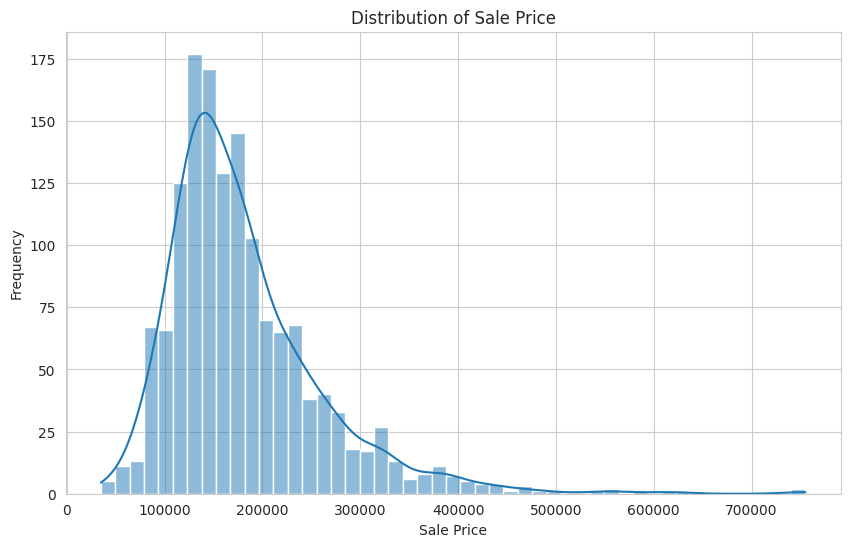

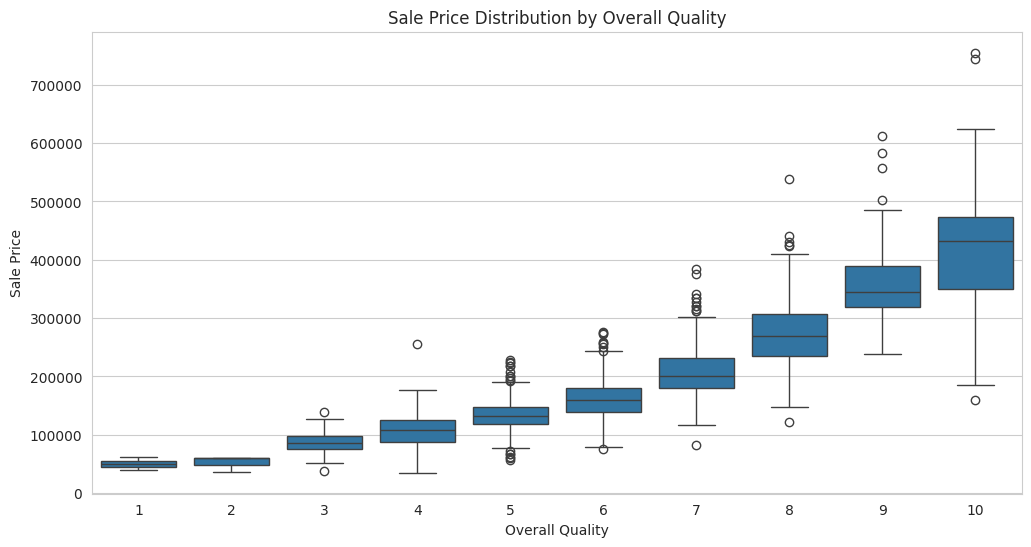

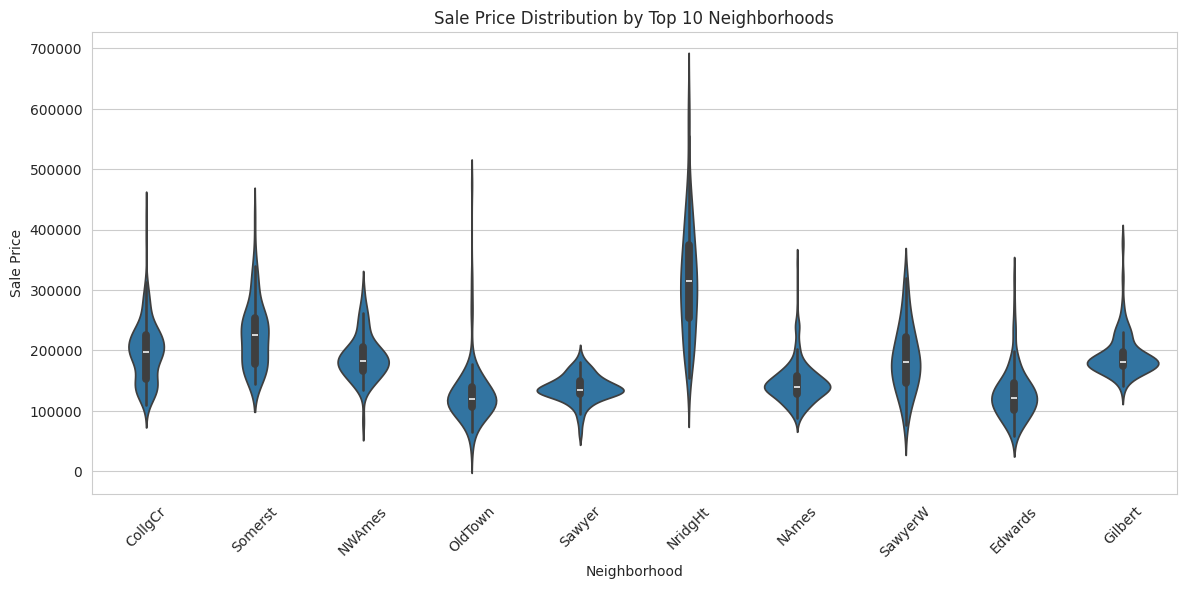

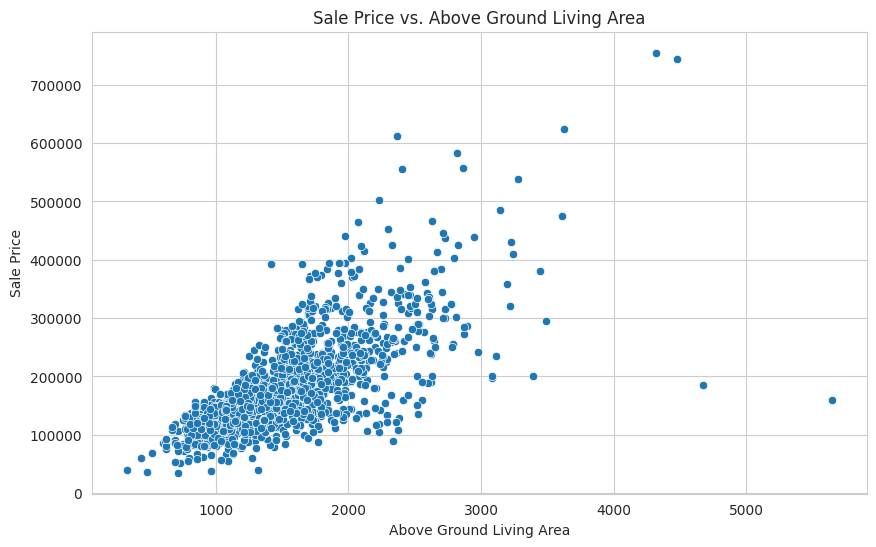

In [ ]:
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('train.csv')

# Thiết lập style cho seaborn
sns.set_style("whitegrid")

# 1. Histogram và KDE plot cho SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot của SalePrice theo OverallQual
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# 3. Violin plot của SalePrice theo Neighborhood (chọn top 10 neighborhood)
top_10_neighborhoods = df['Neighborhood'].value_counts().nlargest(10).index
df_top_10 = df[df['Neighborhood'].isin(top_10_neighborhoods)]

plt.figure(figsize=(14, 6))
sns.violinplot(x='Neighborhood', y='SalePrice', data=df_top_10)
plt.title('Sale Price Distribution by Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

# 4. Scatter plot của SalePrice và GrLivArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
# Số mẫu và số đặc trưng
print("Số mẫu: ", train_data.shape[0])
print("Số đặc trưng: ", train_data.shape[1])

Số mẫu:  1460
Số đặc trưng:  81


In [ ]:
# Hiển thị các cột và kiểu dữ liệu của chúng
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [ ]:
# Đếm số lượng giá trị thiếu trên từng cột
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Thống kê mô tả cho các cột phân loại
print(train_data.describe(include=['object']))

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [ ]:
test_data = pd.DataFrame(test_data)

In [ ]:
train_columns = train_data.columns.tolist()
train_columns.remove('SalePrice')  # Loại bỏ cột SalePrice khỏi danh sách cột

# Kiểm tra xem test_data có tất cả các cột cần thiết không
missing_columns = set(train_columns) - set(test_data.columns)
if missing_columns:
    print(f"Các cột sau đây không có trong test_data: {missing_columns}")
    # Thêm các cột thiếu với giá trị NaN
    for col in missing_columns:
        test_data[col] = np.nan

# Chỉ giữ lại các cột cần thiết trong test_data
test_data = test_data[train_columns]

print("Số cột trong train_data (không bao gồm SalePrice):", len(train_columns))
print("Số cột trong test_data:", test_data.shape[1])

Số cột trong train_data (không bao gồm SalePrice): 80
Số cột trong test_data: 80


Tiền xử lý dữ liệu

In [ ]:
# Tách biến độc lập và biến phụ thuộc
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

# Xác định các cột số và cột phân loại
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Tạo các transformer cho các cột số và cột phân loại
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các transformer lại với nhau thành ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Áp dụng tiền xử lý dữ liệu
X = preprocessor.fit_transform(X)
test_data = preprocessor.transform(test_data)

print("Số đặc trưng trong X sau khi tiền xử lý:", X.shape[1])
print("Số đặc trưng trong test_data sau khi tiền xử lý:", test_data.shape[1])

Số đặc trưng trong X sau khi tiền xử lý: 288
Số đặc trưng trong test_data sau khi tiền xử lý: 288


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuyển đổi thành DenseTensor
X_train = X_train.toarray()
X_val = X_val.toarray()

Fine-tuning Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'max_iter': 1000}
Best score: 1387625952.3119

Fine-tuning kNN...
Best parameters for kNN: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Best score: 1484831253.6598

Fine-tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 1907400683.1318

Fine-tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 1085052285.4766

+----------------+-----------------+------------+------------+--------+
|     Model      |       MSE       |    RMSE    |    MAE     |   R²   |
+----------------+-----------------+------------+------------+--------+
| Neural Network |  876957659.9613 | 29613.4709 | 18598.2031 | 0.8743 |
|      kNN       | 1352315628.6275 | 36773.8444 | 21162.0105 | 0.8062 |
| Decision Tr

<ipython-input-9-cf1680f4f29a>:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right')


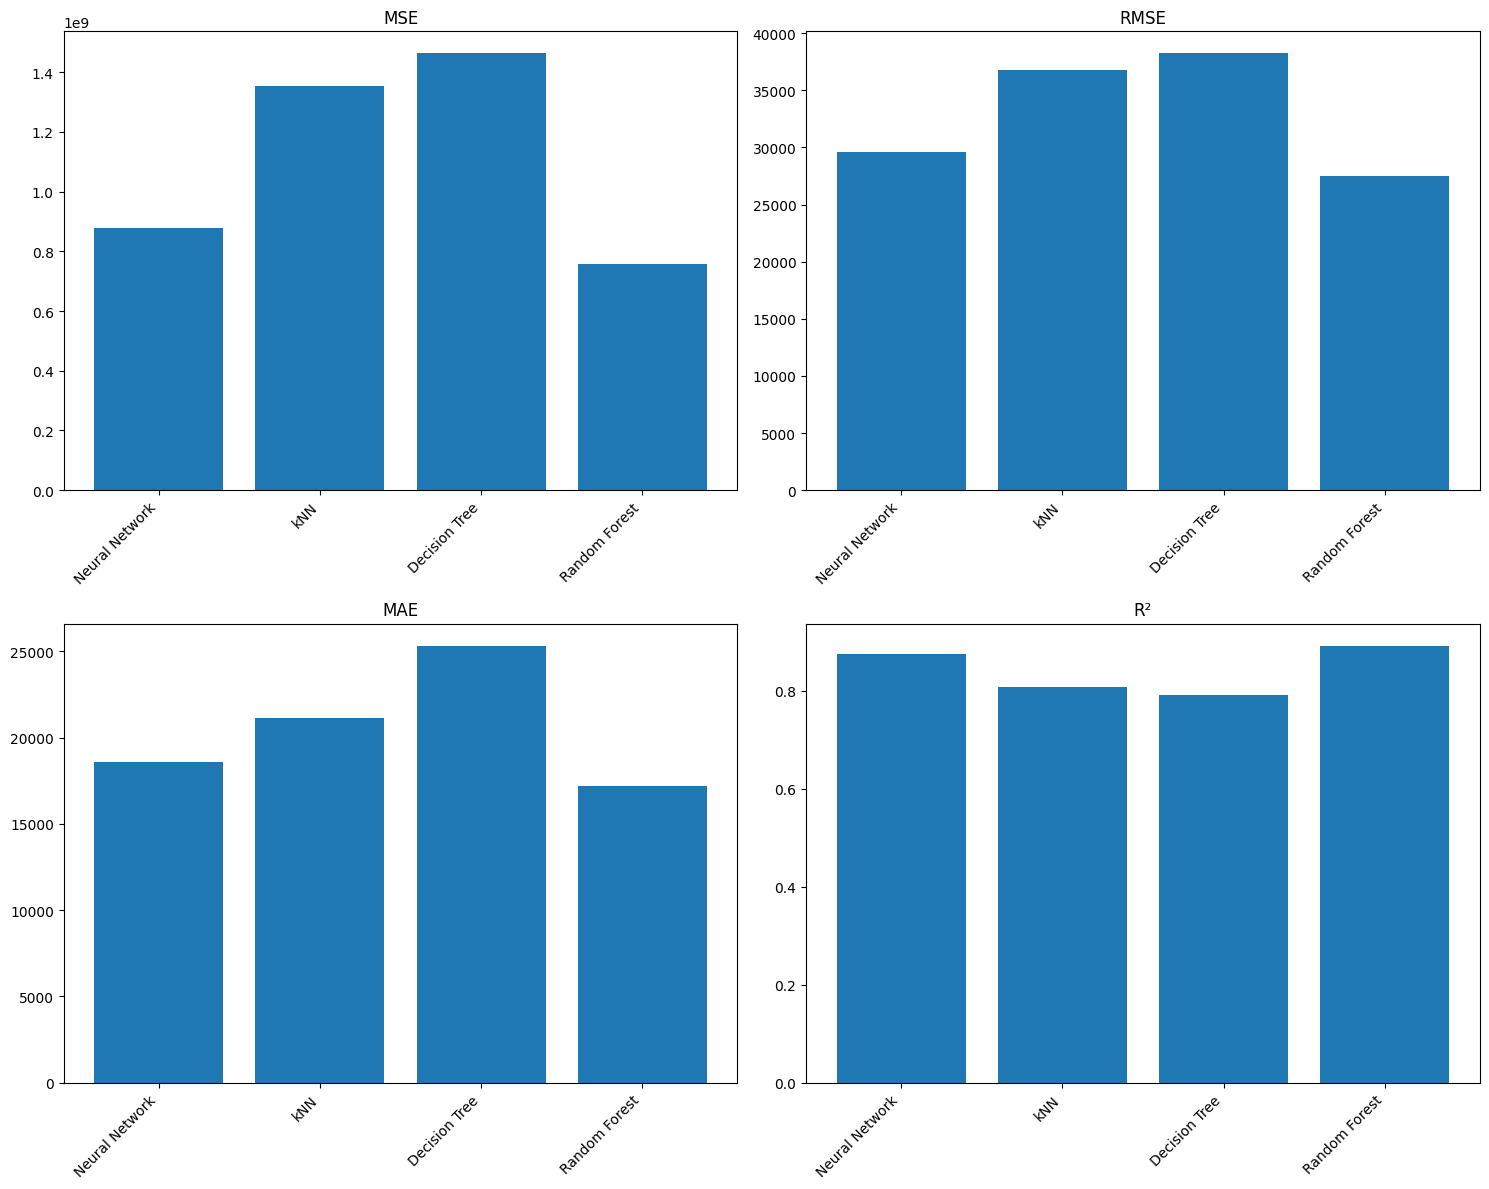

In [ ]:
models = {
    'Neural Network': (MLPRegressor(),
                       {'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32)],
                        'activation': ['relu', 'tanh'],
                        'alpha': [0.0001, 0.001, 0.01],
                        'max_iter': [1000, 2000]}),

    'kNN': (KNeighborsRegressor(),
            {'n_neighbors': [3, 5, 7, 9, 11],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree']}),

    'Decision Tree': (DecisionTreeRegressor(),
                      {'max_depth': [None, 10, 20, 30],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}),

    'Random Forest': (RandomForestRegressor(random_state=42),
                      {'n_estimators': [50, 100, 200],
                       'max_depth': [None, 10, 20, 30],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]})
}

# Thực hiện fine-tuning và đánh giá các mô hình
results = []

for name, (model, params) in models.items():
    print(f"Fine-tuning {name}...")
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results.append((name, mse, rmse, mae, r2, grid_search.best_params_))
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score: {-grid_search.best_score_:.4f}")
    print()

# Hiển thị kết quả bằng PrettyTable
table = PrettyTable()
table.field_names = ["Model", "MSE", "RMSE", "MAE", "R²"]
for result in results:
    table.add_row([result[0]] + [f"{score:.4f}" for score in result[1:5]])

print(table)

# Hiển thị kết quả bằng sơ đồ
models = [result[0] for result in results]
scores = np.array([result[1:5] for result in results])

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['MSE', 'RMSE', 'MAE', 'R²']

for i, (metric, ax) in enumerate(zip(metrics, axs.ravel())):
    ax.bar(models, scores[:, i])
    ax.set_title(metric)
    ax.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# In ra các tham số tốt nhất cho mỗi mô hình
for result in results:
    print(f"\nBest parameters for {result[0]}:")
    for param, value in result[5].items():
        print(f"  {param}: {value}")